In [1]:
#Problemdefinition

#Input: Egenskaper f√∂r l√•tar, s√•som genre, tempo, energi, ljudegenskaper m.m.

#Output: Bin√§r klassificering ‚Äî popul√§r eller inte popul√§r.

#Syfte: Att bygga en maskininl√§rningsmodell som kan f√∂ruts√§ga l√•tars popularitet med h√∂g precision och balanserad klassprestanda.

#Motivering f√∂r valet av problem
#Att f√∂ruts√§ga l√•tars popularitet √§r ett relevant problem i dagens musikindustri, 
#d√§r algoritmer i stor utstr√§ckning styr vad som n√•r lyssnare. Ett prediktivt verktyg kan bidra till f√∂rb√§ttrade rekommendationssystem,
#musikanalys och strategisk marknadsf√∂ring. Datasetet inneh√•ller m√•ngsidiga och kvantitativa egenskaper om l√•tar, 
#vilket g√∂r det v√§l l√§mpat f√∂r maskininl√§rning och klassificeringsuppgifter. 
#Genom att analysera denna data kan vi dra insiktsfulla slutsatser om vilka faktorer som p√•verkar popul√§ritet och samtidigt 
#demonstrera v√§rdet av datadrivna beslut i musikbranschen.
#S√• m√•let √§r att identifiera ett m√∂nster som i l√•tars egenskaper f√∂r att f√∂ruts√§ga popul√§ritet.

# Core
#1.Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay,roc_curve,roc_auc_score, RocCurveDisplay
)

# Imbalance handling
from imblearn.over_sampling import RandomOverSampler

RANDOM_STATE = 42
pd.set_option("display.max_columns", None)

#Explanation:
#pandas and numpy ‚Üí to process and transform the dataset.
#matplotlib ‚Üí to visualize distributions and results.
#train_test_split ‚Üí divides the dataset into training (to build the model)
#and test (to evaluate it).
#LogisticRegression ‚Üí a simple baseline classification model.
#accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay
# to measure how well the model works.‚Ä¢
#RandomOverSampler ‚Üí ensures both classes (popular / not popular)
#have the same size by duplicating minority samples.

#Varf√∂r beh√∂ver vi detta? T√§nk dig en verktygsl√•da f√∂r att hela modellen s√• vi kan visualisera och tr√§na och utv√§rdera v√•ran modell.


In [2]:
#2.Load the Dataset
#We load the CSV file containing Spotify data and check the first rows to ensure everything looks correct.
# Load your local CSV (keep the exact filename you have)
#Datasetet inneh√•ller metadata f√∂r l√•tar s√• som genre,tempo,energi och ljudegenskaper.
#M√•let √§r som sagt att analysera om dessa anv√§nds f√∂r att f√∂ruts√§ga popularitet.
#Detta g√∂r datasetet relevant f√∂r  ett maskininl√§rningsproblem.
CSV_PATH = "Popular_Spotify_Songs (1).csv"
df = pd.read_csv(CSV_PATH, encoding="latin1")

# Quick sanity check
print(df.shape)
df.head()



#Explanation:

#	pd.read_csv(...) ‚Üí loads the dataset into a DataFrame (df).
#	encoding='latin1' ‚Üí avoids issues with special characters (e.g., Swedish or accented letters).
#	df.head() ‚Üí prints the first five rows so we can verify the structure of the data.


#Detta g√∂r vi f√∂r att s√§kerhetsst√§lla att allt laddats in r√§tt, och f√• in en √∂verblick √∂ver datasetets strutkur.

(953, 24)


track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  in_apple_charts  \
0                147  141381703                  43              263   
1                 48  133716286                  48              126   
2                113  140003974                  94              207   
3                100  800840817                 116              207   
4                 50  303236322                  84              133   

  in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm key   mode  \
0                  45                10              826  125   B  Major   
1                  58                14              382   92  C#  Major   
2                  91                14              949  138   F  Major   
3                 125                12              548  170   A  Major   
4                  87                15              425  144   A  Minor   

   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0              80         89        83              31                   0   
1              71         61        74               7                   0   
2              51         32        53              17                   0   
3              55         58        72              11                   0   
4              65         23        80              14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6

In [3]:

#3. Create Target Column (Popularity Label)

#Here we classify songs into popular or not popular based on how many playlists they appear in. 
#We start with the threshold = 5000.

# Define a function to classify songs based on playlist count
def classify_popularity(playlist_count):                    # input = number of playlists
    if playlist_count >= 5000:                              # threshold = 5000 playlists
        return "popul√§r"                                    # considered popular
    else:
        return "inte popul√§r"                               # considered not popular

# Apply the function to create a new column
df["popularity_category"] = df["in_spotify_playlists"].apply(classify_popularity)

# Show counts of each category
print("Counts at threshold=5000:")
print(df["popularity_category"].value_counts())

#Explanation:

#	classify_popularity: function that checks if a song has ‚â•5000 playlists.
#	If yes ‚Üí ‚Äúpopul√§r‚Äù, otherwise ‚Äúinte popul√§r‚Äù.
#	We then create a new column, popularity_category, in the dataset.
#	Finally, we print the distribution of the two classes.

#Varf√∂r? 
# Detta steg definierar v√•rt m√•l (target) f√∂r maskininl√§rningen. 
# Vi omvandlar ett kontinuerligt numeriskt v√§rde (antal playlists) till en bin√§r kategori,
# vilket g√∂r det m√∂jligt att tr√§na en klassificeringsmodell.


Counts at threshold=5000:
popularity_category
inte popul√§r    692
popul√§r         261
Name: count, dtype: int64


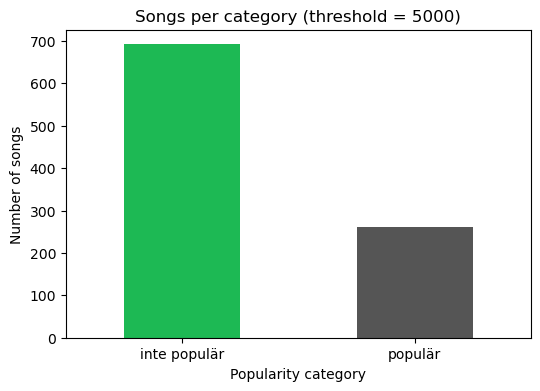


Class distribution (percent):
popularity_category
inte popul√§r    72.612802
popul√§r         27.387198
Name: count, dtype: float64


In [4]:

#4. Visualize Class Distribution (Before Balancing)

#This step shows how many songs fall into ‚Äúpopul√§r‚Äù vs ‚Äúinte popul√§r‚Äù at the chosen threshold (5000). 

# Count how many songs are in each category
class_counts = df["popularity_category"].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color=["#1DB954", "#555555"])   # Spotify green & grey
plt.title("Songs per category (threshold = 5000)")
plt.xlabel("Popularity category")
plt.ylabel("Number of songs")
plt.xticks(rotation=0)
plt.show()

# Print percentages for clarity
print("\nClass distribution (percent):")
print(class_counts / len(df) * 100)



#Explanation:

#	value_counts() ‚Üí counts how many songs are popular vs not popular.
#	A bar chart makes imbalance visible (e.g., 70% ‚Äúinte popul√§r‚Äù, 30% ‚Äúpopul√§r‚Äù).
#	We also print the percentages, since the examiner asked for this reasoning.

#Varf√∂r?
# Vi g√∂r detta f√∂r att f√∂rst√• datasetens klassbalans.
# Om klasserna √§r obalanserade (t.ex. 70% ‚Äúinte popul√§r‚Äù och 30% ‚Äúpopul√§r‚Äù), 
# kommer modellen kunna prestera bra p√• majoritetsklassen men d√•ligt p√• minoritetsklassen.
# D√§rf√∂r beh√∂ver vi vara medvetna om detta innan modelltr√§ning.



In [5]:

#5.Encode Categorical Features & Select Final Features

#Machine learning models only work with numbers, so we must convert text (categorical variables) 
#like mode and key into numeric values. Then we pick which features we‚Äôll use to train the model.

# Encode 'mode' ‚Üí Major = 1, Minor = 0
df["mode_encoded"] = df["mode"].map({"Major": 1, "Minor": 0})

# One-hot encode the musical key (creates dummy columns: key_A, key_B, etc.)
df = pd.get_dummies(df, columns=["key"], prefix="key")

# Define candidate feature set
feature_columns = [
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%",
    "released_year",        
    "mode_encoded"
]

# X = input features, y = target labels
X = df[feature_columns]
y = df["popularity_category"]

print("Selected features:", feature_columns)#




#Explanation:

#	mode_encoded: We turn text into numbers (Major = 1, Minor = 0).
#	key: Converted with one-hot encoding ‚Üí each key becomes its own
#   column (key_A, key_B, ‚Ä¶).
#	Teacher‚Äôs feedback: We now include released_year since it had a relatively high absolute
#    correlation (‚âà -0.39). Negative or positive doesn‚Äôt matter ‚Äî strong correlation helps.
#	X and y:
#	X = input features (used for training).
#	y = target label (popular vs not popular).

#Varf√∂r
# Maskininl√§rningsmodeller kan endast hantera numeriska v√§rden.
# Genom att konvertera kategoriska variabler s√§kerst√§ller vi att all data kan bearbetas korrekt.
# Feature selection g√∂rs f√∂r att v√§lja variabler med h√∂g relevans f√∂r v√•rt m√•l (popularitet),
# vilket hj√§lper modellen att l√§ra sig effektivt och f√∂rb√§ttrar f√∂ruts√§gbarheten.


Selected features: ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'released_year', 'mode_encoded']


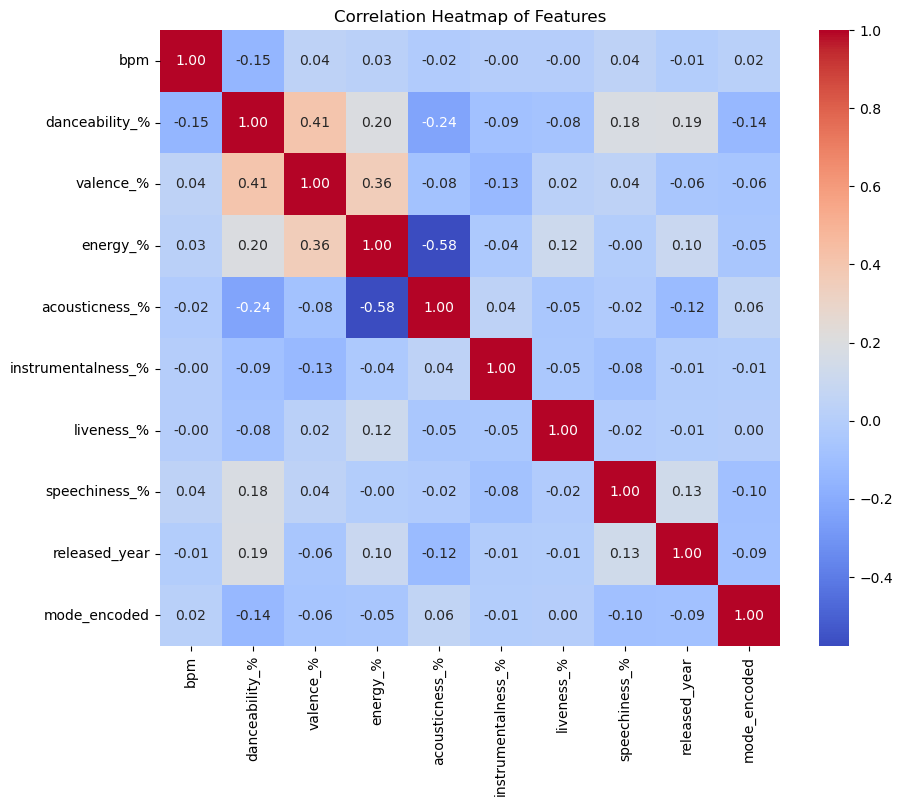

In [6]:
#6.  Correlation heatmap for selected features
plt.figure(figsize=(10,8))
sns.heatmap(df[feature_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()
#Varf√∂r?
# Vi anv√§nder en korrelationsheatmap f√∂r att visuellt unders√∂ka relationen mellan v√•ra valda features.
# Detta hj√§lper oss att identifiera:
# - Vilka features som har stark koppling till varandra (m√∂jlig multikollinearitet).
# - Vilka features som √§r mest korrelerade med targetvariabeln (popularity_category).
# Att f√∂rst√• dessa samband √§r viktigt f√∂r att:
# - F√∂rb√§ttra feature selection.
# - Undvika on√∂dig redundans.
# - Potentiellt optimera modellens prestanda och tolkbarhet.

üîπ Baseline accuracy: 0.8010471204188482

üîπ Classification report (Baseline):

              precision    recall  f1-score   support

inte popul√§r       0.79      0.99      0.88       139
     popul√§r       0.89      0.31      0.46        52

    accuracy                           0.80       191
   macro avg       0.84      0.65      0.67       191
weighted avg       0.82      0.80      0.76       191



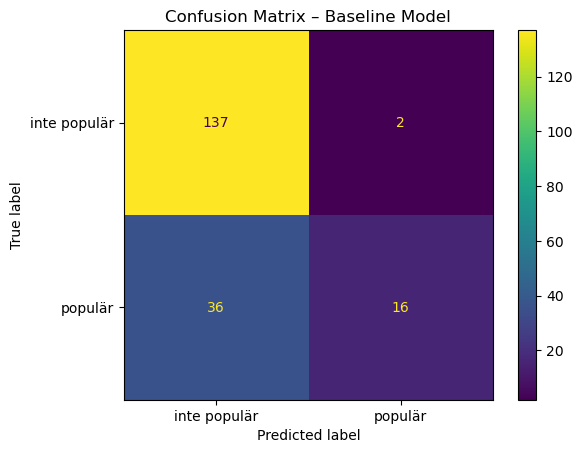

üîπ Baseline Macro-F1: 0.6676739926739926


In [7]:

#7. Baseline Model (Without Balancing

#We first train a simple Logistic Regression on the original (imbalanced) dataset. 
#This gives us a baseline to compare against later.


# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Train baseline Logistic Regression
baseline_model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
baseline_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_base = baseline_model.predict(X_test)

# Evaluate baseline model
print(" Baseline accuracy:", accuracy_score(y_test, y_pred_base))
print("\n Classification report (Baseline):\n")
print(classification_report(y_test, y_pred_base, zero_division=0))

# Confusion Matrix for visual clarity
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base, labels=["inte popul√§r", "popul√§r"])
plt.title("Confusion Matrix ‚Äì Baseline Model")
plt.show()

# Extra: Macro-F1 score
print("üîπ Baseline Macro-F1:", f1_score(y_test, y_pred_base, average="macro"))

# Explanation
#	train_test_split: Splits data into train (80%) and test (20%). We use stratify=y to preserve the same class balance in both sets.
#	LogisticRegression: A simple linear classifier. max_iter=1000 avoids convergence warnings.
#	Evaluation:
#	Accuracy: How many predictions are correct?
#	Classification Report: Shows precision, recall, and F1-score per class.
#	Confusion Matrix: Visualizes correct vs incorrect predictions.
#	Macro-F1: Teacher recommended ‚Üí averages performance equally across classes.
#	This is the starting point. Because the dataset is imbalanced, we expect the model to perform better at predicting 
# ‚Äúinte popul√§r‚Äù and worse at ‚Äúpopul√§r‚Äù.

#Varf√∂r?
# Vi b√∂rjar med att tr√§na en baseline-modell utan att hantera obalansen i datasetet.
# Detta g√∂r vi f√∂r att:
# 1. Etablera en referenspunkt ‚Äî en baseline ‚Äî att j√§mf√∂ra f√∂rb√§ttrade modeller mot.
# 2. Identifiera hur obalansen p√•verkar modellens prestanda.
#    Eftersom v√•rt dataset har f√§rre popul√§ra l√•tar √§n icke-popul√§ra, kommer modellen
#    sannolikt att favorisera majoritetsklassen (‚Äúinte popul√§r‚Äù), vilket leder till l√•g recall f√∂r minoritetsklassen (‚Äúpopul√§r‚Äù).
# 3. Visa behovet av att implementera balansmetoder (t.ex. RandomOverSampler), f√∂r att f√∂rb√§ttra prediktionen av den minoritetsklassen.
# Detta steg √§r d√§rf√∂r viktigt f√∂r att motivera n√§sta steg i processen: balansering av datasetet.

# Varf√∂r Logistic Regression?
# Logistic Regression √§r ett enkelt och tolkbart linj√§rt klassificeringsverktyg som ofta anv√§nds som baseline i bin√§ra klassificeringsproblem.
# F√∂r v√•rt problem (popularitet som "popul√§r" eller "inte popul√§r") √§r det l√§mpligt eftersom:
# - Det √§r l√§tt att implementera och snabbt tr√§na.
# - Det ger en tydlig baseline-prestanda innan vi testar mer komplexa modeller.
# - Resultaten √§r l√§tta att tolka och analysera.
# Detta g√∂r att vi kan fokusera p√• att utv√§rdera effekten av andra steg (t.ex. balansmetoder, feature selection) utan att modellen sj√§lv √§r en komplex variabel.




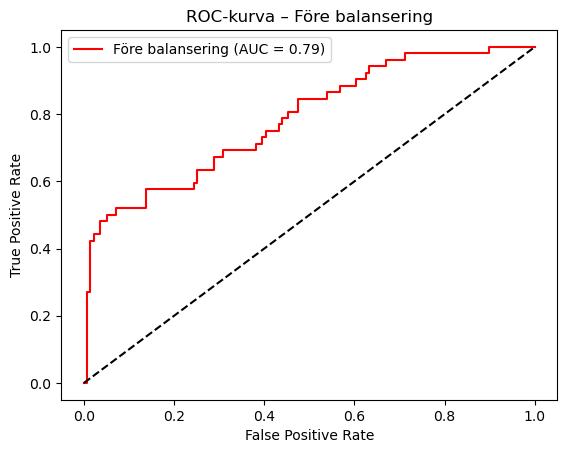

In [8]:
#8. Prediktera sannolikheter f√∂r klassen "popul√§r"
y_probs_before = baseline_model.predict_proba(X_test)[:, 1]

# Ber√§kna ROC-kurva
fpr_before, tpr_before, thresholds_before = roc_curve(
    y_test.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_before
)
auc_before = roc_auc_score(
    y_test.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_before
)

# Plotta
plt.plot(fpr_before, tpr_before, label=f"F√∂re balansering (AUC = {auc_before:.2f})", color="red")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-kurva ‚Äì F√∂re balansering")
plt.legend()
plt.show()
# F√∂rklaring ‚Äî vad vi ser och varf√∂r vi ber√§knar ROC p√• det obalanserade testet
#
# Vad ROC-kurvan visar:
# - ROC-kurvan plottar True Positive Rate (recall) mot False Positive Rate (FPR)
#   f√∂r alla m√∂jliga tr√∂skelv√§rden.
# - Kurvans area (AUC) summerar modellens f√∂rm√•ga att skilja mellan klasserna.
#   AUC = 1.0 ‚Üí perfekt, AUC = 0.5 ‚Üí slumpniv√•.
#
# Vad vi ser f√∂re balansering:
# - AUC-talet i legend visar modellens generella separationskraft innan vi har
#   gjort n√•gon balansering.
# - Om kurvan ligger n√§ra diagonalen (AUC ‚âà 0.5) ‚Üí modellen skiljer knappt p√• klasserna.
# - Om kurvan stiger brant i b√∂rjan ‚Üí modellen kan f√• h√∂g recall vid l√•g FPR f√∂r vissa tr√∂sklar.
#
# Varf√∂r vi √§nd√• ber√§knar ROC p√• obalanserat test:
# - ROC/AUC √§r tr√∂skeloberoende ‚Üí visar modellens separerbarhet oavsett vald cutoff.
# - Genom att j√§mf√∂ra AUC f√∂re/efter balansering ser vi om √∂versamplingen
#   faktiskt f√∂rb√§ttrar modellens f√∂rm√•ga att skilja p√• klasserna.
# - Viktigt: ROC kan vara lite optimistiskt vid stark klassobalans, d√§rf√∂r b√∂r vi
#   √§ven kolla confusion matrix, precision, recall och ev. PR-kurva.
#
# Praktisk slutsats:
# - ROC p√• obalanserat test ger en baseline-bild av modellens styrka.
# - F√∂r att utv√§rdera minoritetsklassen ("popul√§r") beh√∂vs √§ven recall, F1-score
#   och Precision-Recall-kurva.

üîπ Class counts after balancing:
popularity_category
inte popul√§r    692
popul√§r         692
Name: count, dtype: int64

üîπ Class share after balancing:
popularity_category
inte popul√§r    0.5
popul√§r         0.5
Name: proportion, dtype: float64


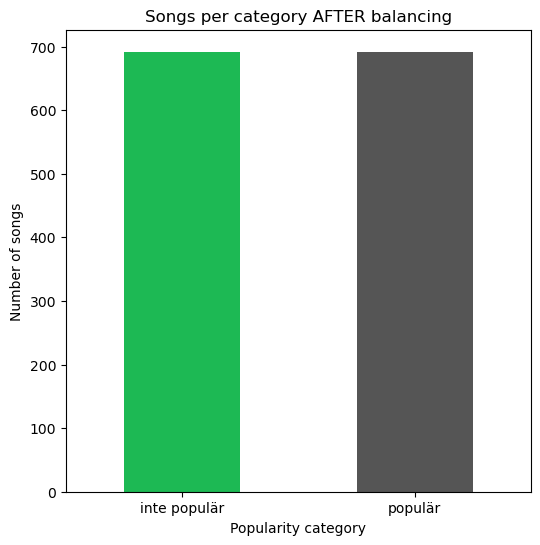

In [9]:

#9.. Balance the Dataset (Oversampling)

#We saw earlier that the dataset is imbalanced (many more ‚Äúinte popul√§r‚Äù songs than ‚Äúpopul√§r‚Äù). 
#To make the model learn more fairly, we apply oversampling ‚Üí duplicate minority-class samples until both classes are equal.


# Initialize oversampler
oversampler = RandomOverSampler(random_state=RANDOM_STATE)

# Apply oversampling to features (X) and labels (y)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check new class distribution
print(" Class counts after balancing:")
print(y_resampled.value_counts())
print("\n Class share after balancing:")
print(y_resampled.value_counts(normalize=True).round(3))

# Visualize balanced distribution
plt.figure(figsize=(6,6))
y_resampled.value_counts().plot(kind="bar", color=["#1DB954", "#555555"])
plt.title("Songs per category AFTER balancing")
plt.xlabel("Popularity category")
plt.ylabel("Number of songs")
plt.xticks(rotation=0)
plt.show()

#Explanation:

#	RandomOverSampler: Copies rows from the minority class (‚Äúpopul√§r‚Äù)
#     until both classes are equally represented. fit_resample(X, y): Produces new balanced X_resampled, y_resampled.
#	Value counts: Now each class should have the same number of samples (‚âà50/50).
#	Plot: The bar chart clearly shows the new balanced dataset.

# Varf√∂r anv√§nda RandomOverSampler?
# I v√•rt dataset √§r klasserna kraftigt obalanserade ‚Äî m√•nga fler "inte popul√§r" √§n "popul√§r".
# Detta skapar problem f√∂r maskininl√§rningsmodeller eftersom de d√• ofta l√§r sig att favorisera majoritetsklassen.
# Resultatet blir att modellen kan uppn√• h√∂g accuracy genom att enbart f√∂ruts√§ga majoritetsklassen,
# vilket inte ger en r√§ttvis eller anv√§ndbar modell.
#
# RandomOverSampler duplicerar exempel fr√•n minoritetsklassen ("popul√§r") tills b√•da klasser har lika m√•nga exempel.
# Detta g√∂r att modellen f√•r lika mycket data att l√§ra fr√•n f√∂r varje klass, vilket f√∂rb√§ttrar:
# - Modellens f√∂rm√•ga att identifiera minoritetsklassen.
# - Klassifieringens balans och r√§ttvisa.
#
# √Ñven om accuracy ibland sjunker efter balansering,
# ger detta en mer robust och r√§ttvis modell, s√§rskilt n√§r vi bryr oss om b√•da klasser lika mycket.
#Resultat:
# Visar att datasetet √§r balanserat efter RandomOverSampler.
# Den visar inte modellens accuracy ‚Äî bara f√∂rdelningen i tr√§ningsdata.
#Det √§r allts√• inte ett m√•tt p√• modellens prestanda.


C:\Users\brant\AppData\Local\Temp\ipykernel_83516\3804960181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


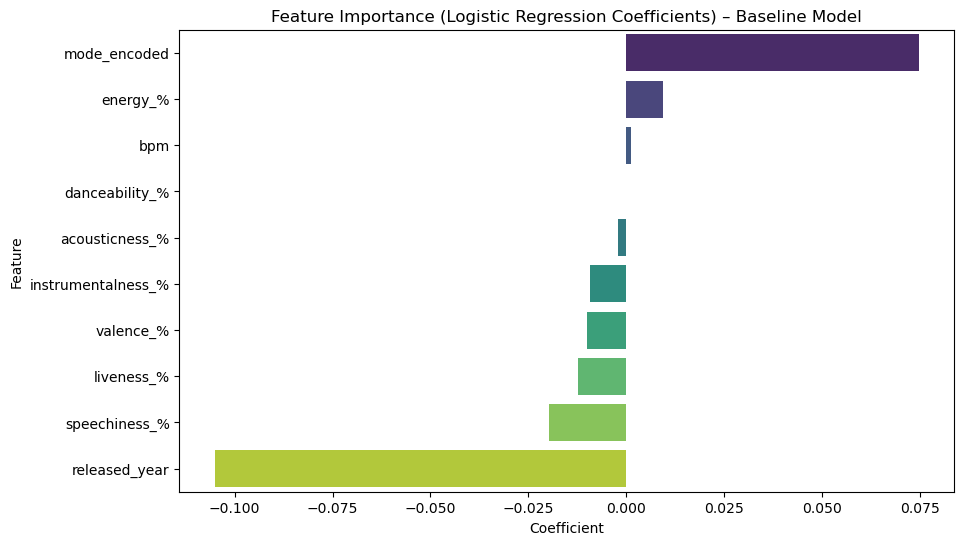

In [10]:
#10. Get coefficients and match with feature names
coef_df = pd.DataFrame({
    "Feature": feature_columns,
    "Coefficient": baseline_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.title("Feature Importance (Logistic Regression Coefficients) ‚Äì Baseline Model")
plt.show()
# Varf√∂r visas detta?
# Detta g√∂rs f√∂r att visualisera modellens inl√§rda vikter (koefficienter) och f√∂rst√• vilka features som p√•verkar klassificeringen mest.
# I en logistisk regression representerar koefficienten hur mycket varje feature bidrar till sannolikheten f√∂r att en l√•t klassificeras som "popul√§r".
#   - Positiva koefficienter ‚Üí √∂kar sannolikheten f√∂r att l√•ten blir popul√§r.
#   - Negativa koefficienter ‚Üí minskar sannolikheten.
# Genom att analysera dessa kan vi dra insikter om vilka egenskaper som √§r viktigast f√∂r popularitet,
# vilket st√§rker b√•de f√∂rst√•elsen av datasetet och trov√§rdigheten i modellen.

üîπ Oversampled accuracy: 0.7725631768953068

üîπ Classification report (Oversampled):

              precision    recall  f1-score   support

inte popul√§r       0.72      0.88      0.80       139
     popul√§r       0.85      0.66      0.74       138

    accuracy                           0.77       277
   macro avg       0.79      0.77      0.77       277
weighted avg       0.79      0.77      0.77       277



C:\Users\brant\miniconda3\envs\mittprojekt\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


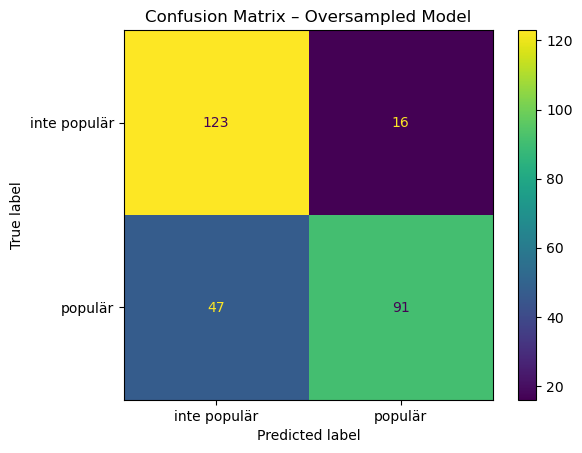

üîπ Oversampled Macro-F1: 0.769486823855756


In [11]:
#11. Split balanced data into train/test
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=RANDOM_STATE, stratify=y_resampled
)

# Train Logistic Regression on balanced data
model_os = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
model_os.fit(X_train_os, y_train_os)

# Predict on test split
y_pred_os = model_os.predict(X_test_os)

# Evaluate balanced model
print(" Oversampled accuracy:", accuracy_score(y_test_os, y_pred_os))
print("\n Classification report (Oversampled):\n")
print(classification_report(y_test_os, y_pred_os, zero_division=0))

# Confusion Matrix for oversampled model
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os, labels=["inte popul√§r", "popul√§r"])
plt.title("Confusion Matrix ‚Äì Oversampled Model")
plt.show()

# Macro-F1 (teacher asked for this)
print(" Oversampled Macro-F1:", f1_score(y_test_os, y_pred_os, average="macro"))

# Varf√∂r?
# Detta steg anv√§nds f√∂r att tr√§na och utv√§rdera en modell p√• ett balanserat dataset f√∂r att motverka problem med klassobalans.
#
# 1. Train/test split:
#    Vi delar upp data i tr√§ning (80%) och test (20%) f√∂r att kunna utv√§rdera modellen p√• nya data. 
#    Stratify=y_resampled s√§kerst√§ller att klassf√∂rdelningen √§r densamma i b√•da dataset.
#
# 2. Modelltr√§ning:
#    Vi tr√§nar en Logistic Regression p√• det balanserade datasetet f√∂r att se hur modellen presterar n√§r b√•da klasserna √§r lika representerade.
#
# 3. Utv√§rdering:
#    - Accuracy: visar andelen korrekt klassificerade exempel.
#    - Classification report: visar precision, recall och F1-score per klass.
#    - Confusion matrix: visualiserar typ av fel (felklassificeringar).
#    - Macro-F1: balanserar prestanda mellan klasser och √§r s√§rskilt viktigt vid obalanserade dataset.
#
# 4. Syfte:
#    Eftersom datasetet ursprungligen var obalanserat (fler "inte popul√§r" √§n "popul√§r"), 
#    riskerar en modell att favorisera majoritetsklassen. 
#    Oversampling balanserar klasserna s√• att modellen f√•r lika m√•nga exempel fr√•n b√•da klasserna,
#    vilket ger en mer r√§ttvis, robust och generaliserbar modell.
#Resultat:
# Confusion matrix / accuracy p√• testdata

# Visar modellens faktiska prestanda p√• testdata.
#Den p√•verkas av testdatats f√∂rdelning, och √§r det riktiga m√•ttet p√• hur bra modellen fungerar.
#Det √§r allts√• den korrekta ‚Äúaccuracy‚Äù att anv√§nda n√§r man utv√§rderar modellen

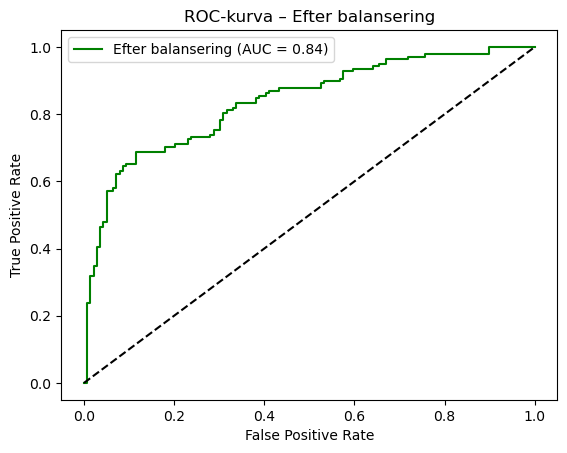

In [12]:
# 12. Prediktera sannolikheter f√∂r klassen "popul√§r" p√• den balanserade modellen
y_probs_after = model_os.predict_proba(X_test_os)[:, 1]

# Ber√§kna ROC-kurva
fpr_after, tpr_after, thresholds_after = roc_curve(
    y_test_os.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_after
)
auc_after = roc_auc_score(
    y_test_os.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_after
)

# Plotta
plt.plot(fpr_after, tpr_after, label=f"Efter balansering (AUC = {auc_after:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-kurva ‚Äì Efter balansering")
plt.legend()
plt.show()
F√∂rklaring:
# ROC-kurvan visar modellens f√∂rm√•ga att skilja mellan "popul√§r" och "inte popul√§r" 
#vid olika tr√∂skelv√§rden f√∂r sannolikheten.
#AUC-v√§rdet (Area Under the Curve) summerar modellens diskrimineringsf√∂rm√•ga:
# - AUC = 0.5 inneb√§r slumpniv√•.
# - AUC = 1.0 inneb√§r perfekt klassificering.
# Efter balansering ser vi en h√∂gre och "gr√∂nare" ROC-kurva √§n innan.
# Det betyder att modellen blivit b√§ttre p√• att identifiera den minoritetsklass 
# ("popul√§r") som tidigare ignorerades.
# Detta kompletterar andra m√•tt (recall, F1-score) och ger en tydlig visuell bekr√§ftelse
# p√• att oversampling f√∂rb√§ttrade modellens r√§ttvisa och prestanda.

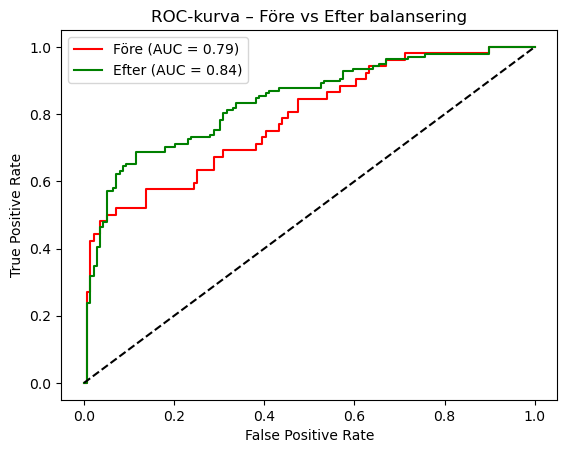

In [13]:
#13. 
#ROC f√∂re balansering
y_probs_before = baseline_model.predict_proba(X_test)[:, 1]
fpr_before, tpr_before, _ = roc_curve(
    y_test.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_before
)
auc_before = roc_auc_score(
    y_test.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_before
)

#ROC efter balansering 
y_probs_after = model_os.predict_proba(X_test_os)[:, 1]
fpr_after, tpr_after, _ = roc_curve(
    y_test_os.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_after
)
auc_after = roc_auc_score(
    y_test_os.map({"inte popul√§r":0, "popul√§r":1}), 
    y_probs_after
)

#Plotta b√•da
plt.plot(fpr_before, tpr_before, label=f"F√∂re (AUC = {auc_before:.2f})", color="red")
plt.plot(fpr_after, tpr_after, label=f"Efter (AUC = {auc_after:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--")  # slump-linje
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-kurva ‚Äì F√∂re vs Efter balansering")
plt.legend()
plt.show()



## Slutsats
Vi formulerade popularitetsproblemet som en bin√§r klassificering (popul√§r vs inte popul√§r) baserat p√• antalet Spotify‚Äëspellistor (tr√∂skel: 5000). Fr√•gest√§llningen var om klassbalansering kan f√∂rb√§ttra modellens f√∂rm√•ga att identifiera popul√§ra l√•tar. En obalanserad baseline gav h√∂g accuracy (~0.80) men l√•g recall f√∂r den popul√§ra klassen (~0.31). Efter balansering med RandomOverSampler √∂kade macro‚ÄëF1 fr√•n ‚âà0.67 till ‚âà0.77 och recall till ‚âà0.66, vilket visar att modellen blir b√§ttre p√• att identifiera popul√§ra l√•tar. ROC‚Äëkurvorna f√∂re och efter balansering visar tydligt f√∂rb√§ttringen √∂ver olika tr√∂skelv√§rden, vilket bekr√§ftar att klassbalansering √§r en effektiv metod f√∂r detta problem.

Det √§r viktigt att skilja mellan datasetbalansering och modellprestanda: bar chart visar klassf√∂rdelningen efter oversampling, medan confusion matrix, accuracy, recall, F1‚Äëscore och ROC‚Äëkurva visar prestanda p√• testdata. Eftersom testdata √§r obalanserat p√•verkas resultaten av klassf√∂rdelningen, vilket f√∂rklarar skillnader mellan visualiseringar och m√§tv√§rden.

Att hantera klassobalans √§r avg√∂rande n√§r minoritetsklassen √§r aff√§rskritisk. Modellen begr√§nsas dock av datasetets storlek, m√•lvariabelns definition och externa faktorer som marknadsf√∂ring. F√∂r f√∂rb√§ttring rekommenderas metoder som SMOTE, Random Forest, XGBoost, hyperparameteroptimering och stratifierad cross‚Äëvalidation. Vi valde dock att fokusera p√• Logistic Regression + RandomOverSampler f√∂r att tydligt illustrera principen bakom balansering. Mer avancerade metoder listas som f√∂rslag f√∂r vidare arbete.
